In [ ]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
import torch.utils.data
import torch.nn as nn
import os
import torch.optim as optim
from matplotlib import pyplot as plot
import time
import numpy as np

from torchvision import models

## Загрузка данных

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar-10-python.tar.gz to /content
Files already downloaded and verified
Количество тренировочных данных:  50000
Количество тестировочных данных:  10000


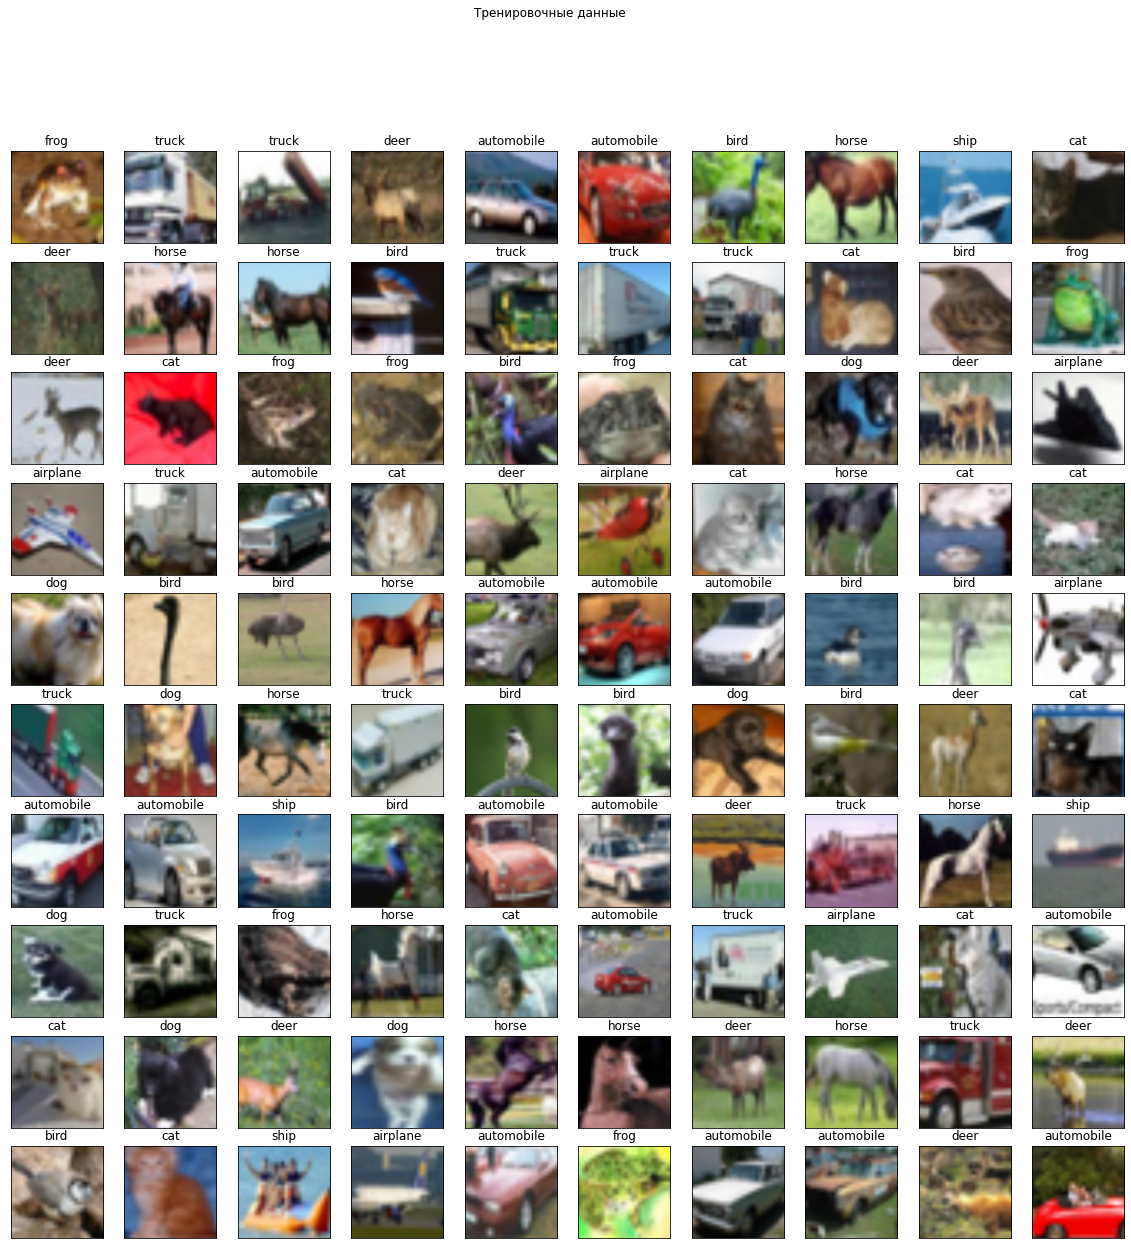

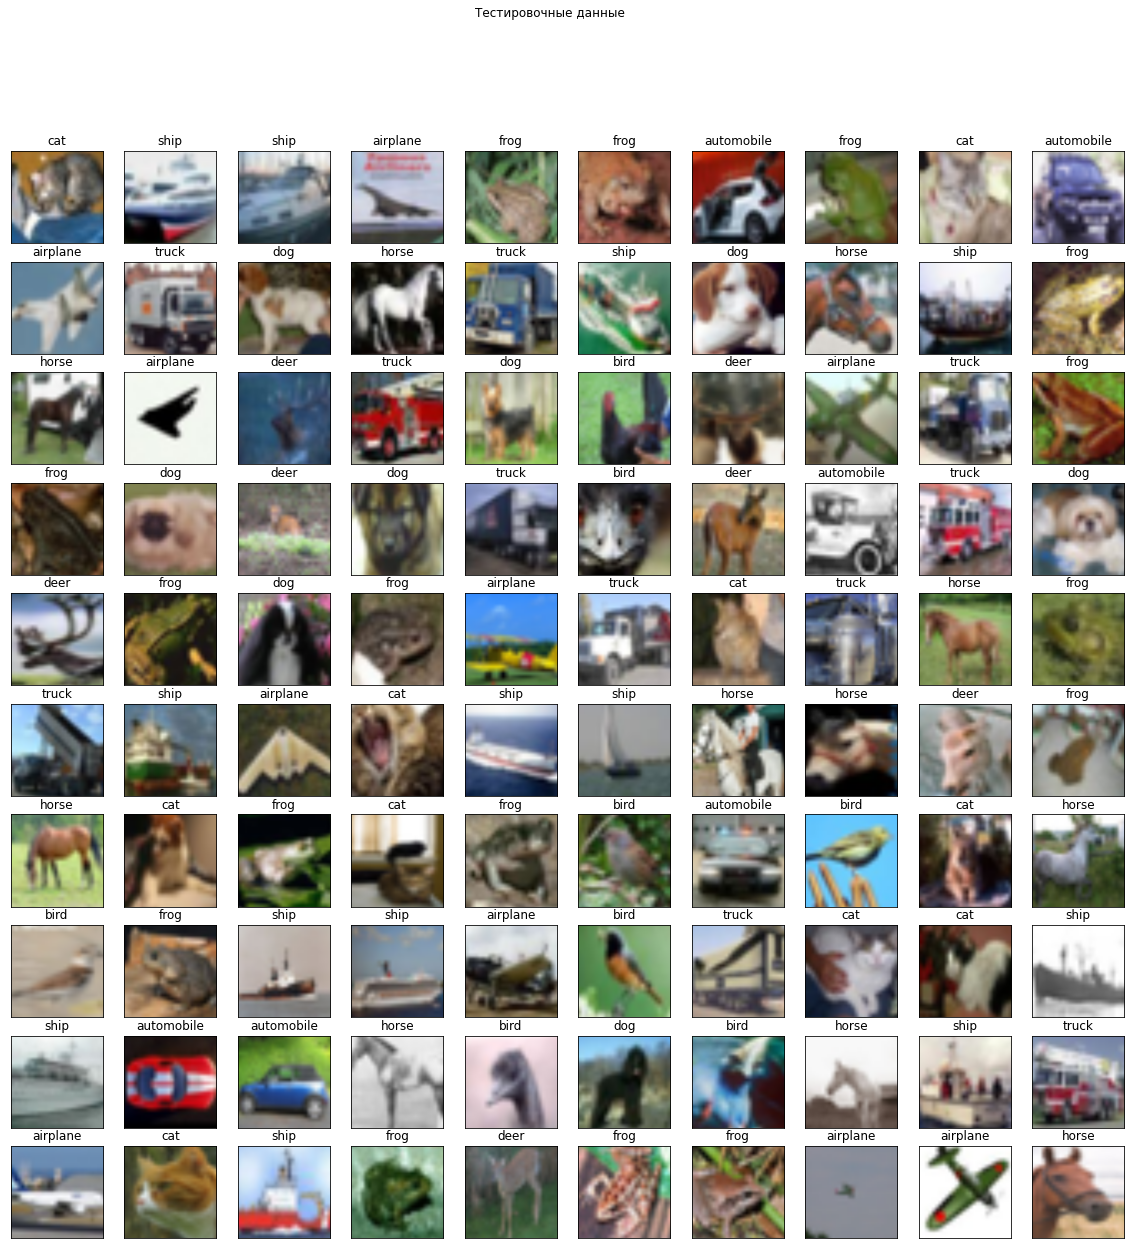

In [ ]:
# Загрузка набора данных CIFAR10

dir_name = os.getcwd() # данные будут скачиваться в текущую папку
batch_size = 128 # размер обрабатываемой пачки данных
# Функция для демонстрации изображений
def show_images(images, title):
    num_showed_imgs_x = 10
    num_showed_imgs_y = 10

    table = {0: "airplane",
            1: "automobile",
            2 : "bird",
            3 : "cat",
            4 : "deer",
            5 : "dog",
            6 : "frog",
            7 : "horse",
            8 : "ship",
            9 : "truck"}

    figsize = (20, 20)
    fig, axes = plot.subplots(num_showed_imgs_y, num_showed_imgs_x, figsize = figsize)
    fig.suptitle(title)
    plot.setp(plot.gcf().get_axes(), xticks = [], yticks = [])
    for i, ax in enumerate(axes.flat):
        # images[i][0] - изображение в виде тензора
        # images[i][1] - число, означающее принадлежность к классу
        img = images[i][0].numpy().transpose(1, 2, 0) # меняем оси
        ax.imshow(img)  # вывод изображения
        ax.set_title(table[images[i][1]]) # вывод метки изображения

# Чтение тренировочной и тестовой выборок набора данных CIFAR10.
# Данные представляются в виде пар, где первый элемент - 
# изображение в формате PIL.Image.Image, а второй - целочисленная метка класса.

# С помощью transform преобразуем изображение в torch.Tensor
# изображений в формат torch.Tensor для последующей работы

transform = transforms.Compose([ 
    transforms.Resize(256), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(),  
])

train_dataset = torchvision.datasets.CIFAR10(root = dir_name, train = True, download = True,
                                           transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = dir_name, train = False, download = True,
                                          transform = transform)

# Вывод информации о данных
print('Количество тренировочных данных: ', len(train_dataset))
show_images(train_dataset, 'Тренировочные данные')

print('Количество тестировочных данных: ', len(test_dataset))
show_images(test_dataset, 'Тестировочные данные')

# Создание объектов для последовательной загрузки пачек
# из тренировочной и тестовой выборок
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                                shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                               shuffle = False)

In [ ]:
# check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## VGG без фиксирования весов

In [ ]:
vgg16 = models.vgg16(pretrained=True)
vgg16.to(device)
print(vgg16)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16.classifier = nn.Sequential(
                nn.Linear(25088, 4096, True),
                nn.ReLU(inplace=True),
                nn.Linear(4096, 4096, True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 10, True)).to(device)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# optimizer
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()

num_epochs = 2 # количество эпох

In [ ]:
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным

            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор предсказанных меток с максимальной достоверностью.
            # векторов достоверности принадлежности каждому из 10 допустимых классов
            # predicted - объект типа torch.tensor (одномерный тензор меток классов).
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы (принадлежность классу)
            n += labels.size(0)
            tp += (predicted == labels).sum() # определение количества совпадений
    return tp / n

import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = vgg16(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, vgg16)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.6481999754905701
Epoch[1]: accuracy = 0.7300399541854858
Time: 2066.22 s
Num epochs:  2
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
accur = list() # будет записываться точность

In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, vgg16).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.7182999849319458
Time: 0.004772440235637412 s


# VGG с фиксированными весами

In [ ]:
vgg16_fixed = models.vgg16(pretrained=True)
vgg16_fixed.to(device)
print(vgg16_fixed)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16_fixed.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# замораживаем параметры (веса)
for param in vgg16_fixed.parameters():
    param.requires_grad = False

In [ ]:
vgg16_fixed.classifier = nn.Sequential(
                nn.Linear(25088, 4096, True),
                nn.ReLU(),
                nn.Linear(4096, 4096, True),
                nn.ReLU(),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 10, True)).to(device)
print(vgg16_fixed)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16_fixed.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [ ]:
# optimizer
optimizer = optim.SGD(vgg16_fixed.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()

num_epochs = 2 # количество эпох

In [ ]:
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным

            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор предсказанных меток с максимальной достоверностью.
            # векторов достоверности принадлежности каждому из 10 допустимых классов
            # predicted - объект типа torch.tensor (одномерный тензор меток классов).
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы (принадлежность классу)
            n += labels.size(0)
            tp += (predicted == labels).sum() # определение количества совпадений
    return tp / n

import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = vgg16_fixed(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, vgg16_fixed)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.6479200124740601
Epoch[1]: accuracy = 0.7297799587249756
Time: 1625.22 s
Num epochs:  2
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, vgg16_fixed).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.7170999646186829
Time: 0.004771976625617546 s


## AlexNet без фиксирования весов

In [ ]:
alexnet_model = models.alexnet(pretrained=True)
alexnet_model.to(device)
print(alexnet_model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# модификация слоев
alexnet_model.classifier = nn.Sequential(
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(9216, 4096, True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 1024, True),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 10, True)).to(device)
print(alexnet_model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# optimizer
optimizer = optim.SGD(alexnet_model.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 10 # количество эпох

## Обучение

In [ ]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = alexnet_model(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, alexnet_model)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.6185799837112427
Epoch[1]: accuracy = 0.7441200017929077
Epoch[2]: accuracy = 0.7573399543762207
Epoch[3]: accuracy = 0.7821599841117859
Epoch[4]: accuracy = 0.816379964351654
Epoch[5]: accuracy = 0.8388400077819824
Epoch[6]: accuracy = 0.8477199673652649
Epoch[7]: accuracy = 0.8561199903488159
Epoch[8]: accuracy = 0.8639000058174133
Epoch[9]: accuracy = 0.8668799996376038
Time: 1839.86 s
Num epochs:  10
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, alexnet_model).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.8296999931335449
Time: 0.0013753559346063227 s


## AlexNet с фиксированными весами

In [ ]:
alexnet_fixed = models.alexnet(pretrained=True)
alexnet_fixed.to(device)
print(alexnet_fixed)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# замораживаем параметры (веса)
for param in alexnet_fixed.parameters():
    param.requires_grad = False

In [ ]:
# модификация слоев
alexnet_fixed.classifier = nn.Sequential(
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(9216, 4096, True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 1024, True),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 10, True)).to(device)
print(alexnet_fixed)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet_fixed.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [ ]:
# optimizer
optimizer = optim.SGD(alexnet_fixed.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 10 # количество эпох

In [ ]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = alexnet_fixed(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, alexnet_fixed)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.4870999753475189
Epoch[1]: accuracy = 0.5914199948310852
Epoch[2]: accuracy = 0.6289600133895874
Epoch[3]: accuracy = 0.6557199954986572
Epoch[4]: accuracy = 0.6649599671363831
Epoch[5]: accuracy = 0.678380012512207
Epoch[6]: accuracy = 0.6838399767875671
Epoch[7]: accuracy = 0.6848599910736084
Epoch[8]: accuracy = 0.6941800117492676
Epoch[9]: accuracy = 0.7013999819755554
Time: 1789.23 s
Num epochs:  10
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, alexnet_fixed).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.6818000078201294
Time: 0.0014109096808146827 s


## Перезапишем размер батчей

In [ ]:
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                                shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                               shuffle = False)

# ResNet без фиксирования весов

In [ ]:
resnet_model = models.resnet18(pretrained=True)
print(resnet_model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# модификация слоев
resnet_model.fc = nn.Linear(512, 10, True)
resnet_model.to(device)
print(resnet_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# optimizer
optimizer = optim.SGD(resnet_model.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 5 # количество эпох

In [ ]:
import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = resnet_model(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, resnet_model)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.935979962348938
Epoch[1]: accuracy = 0.96697998046875
Epoch[2]: accuracy = 0.9816599488258362
Epoch[3]: accuracy = 0.9897799491882324
Epoch[4]: accuracy = 0.9955199956893921
Time: 1493.08 s
Num epochs:  5
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, resnet_model).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.9330999851226807
Time: 0.0015258904034718157 s


# ResNet с фиксированием весов

In [ ]:
resnet_fixed = models.resnet18(pretrained=True)
print(resnet_fixed)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# замораживаем параметры (веса)
for param in resnet_fixed.parameters():
    param.requires_grad = False

In [ ]:
# модификация слоев
resnet_fixed.fc = nn.Linear(512, 10, True)
resnet_fixed.to(device)
print(resnet_fixed)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in resnet_fixed.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [ ]:
# optimizer
optimizer = optim.SGD(resnet_fixed.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 5 # количество эпох

In [ ]:
import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = resnet_fixed(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, resnet_fixed)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.7404599785804749
Epoch[1]: accuracy = 0.762719988822937
Epoch[2]: accuracy = 0.7638999819755554
Epoch[3]: accuracy = 0.7646999955177307
Epoch[4]: accuracy = 0.7702800035476685
Time: 1295.33 s
Num epochs:  5
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, resnet_fixed).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.7572999596595764
Time: 0.001515125599912942 s


# EfficientNet без фиксирования весов

In [ ]:
efficient_model = models.efficientnet_v2_s(pretrained=True)
efficient_model.to(device)
print(efficient_model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth


  0%|          | 0.00/82.7M [00:00<?, ?B/s]

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# модификация слоев
efficient_model.classifier = nn.Sequential(
                            nn.Dropout(p=0.2, inplace=True),
                            nn.Linear(1280, 10, True)).to(device)
print(efficient_model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# optimizer
optimizer = optim.SGD(efficient_model.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 2 # количество эпох

In [ ]:
import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = efficient_model(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, efficient_model)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.9550999999046326
Epoch[1]: accuracy = 0.9768199920654297
Time: 1592.40 s
Num epochs:  2
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, efficient_model).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.9513999819755554
Time: 0.0032137100355693706 s


# EfficientNet с фиксированием весов

In [ ]:
efficient_fixed = models.efficientnet_v2_s(pretrained=True)
efficient_fixed.to(device)
print(efficient_fixed)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# замораживаем параметры (веса)
for param in efficient_fixed.parameters():
    param.requires_grad = False

In [ ]:
# модификация слоев
efficient_fixed.classifier = nn.Sequential(
                            nn.Dropout(p=0.2, inplace=True),
                            nn.Linear(1280, 10, True)).to(device)
print(efficient_fixed)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
for param in efficient_fixed.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
# optimizer
optimizer = optim.SGD(efficient_fixed.parameters(), lr=0.001, momentum=0.9)
# loss function
loss_function = nn.CrossEntropyLoss()
num_epochs = 2 # количество эпох

In [ ]:
import time
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data_loader): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = efficient_fixed(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки
        # Обратный проход
        optimizer.zero_grad() # обнуление градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Вывод точности на тренировочных данных после завершения эпохи
    print('Epoch[{}]: accuracy = {}'.format(epoch, get_accuracy(train_data_loader, efficient_fixed)))

# Вывод времени обучения и информации о параметрах алгоритма
print('Time: {:.2f} s'.format(time.time() - training_start_time))
print("Num epochs: ", num_epochs)
print("Optimizer:\n ", optimizer)

Epoch[0]: accuracy = 0.6634799838066101
Epoch[1]: accuracy = 0.6828199625015259
Time: 1232.28 s
Num epochs:  2
Optimizer:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Вывод точности на тестовых данных
accur.append(get_accuracy(test_data_loader, efficient_fixed).to("cpu").detach().numpy())
print('Test accuracy: {}'.format(accur[-1]))
print('Time: {} s'.format((time.time() - test_start_time) / (len(test_data_loader) * batch_size)))

Test accuracy: 0.682699978351593
Time: 0.003215854255536113 s


In [ ]:
accur

[array(0.7183, dtype=float32),
 array(0.71709996, dtype=float32),
 array(0.8297, dtype=float32),
 array(0.6818, dtype=float32),
 array(0.9331, dtype=float32),
 array(0.75729996, dtype=float32),
 array(0.9514, dtype=float32),
 array(0.6827, dtype=float32)]

## Строим гистограмму

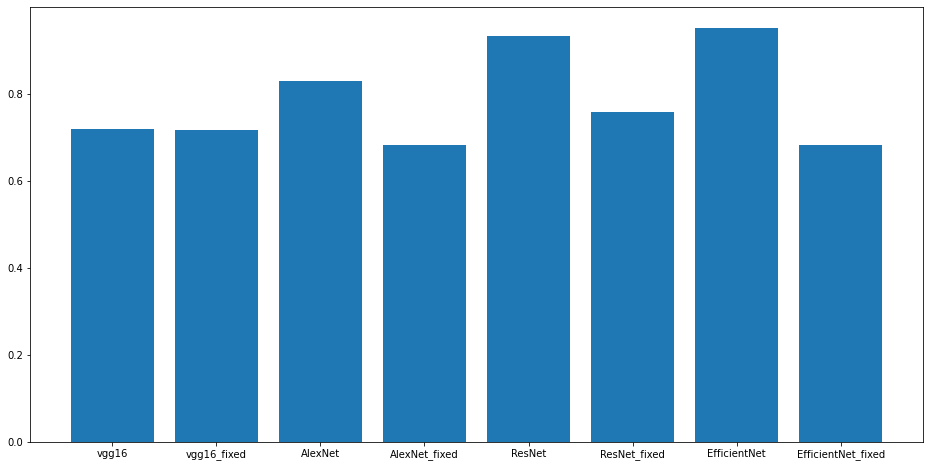

In [ ]:
fig, ax = plot.subplots(figsize=(16,8))
index = ["vgg16", "vgg16_fixed", "AlexNet", "AlexNet_fixed", "ResNet", "ResNet_fixed", "EfficientNet", "EfficientNet_fixed"]
values = accur
plot.bar(index, values)
plot.show()

## Для модели efficientnet_v2_s получена лучшая точность.

In [ ]:
print(efficient_model.classifier) # модифицированные слои

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)


### Тип эксперимента: без заморозки предобученных весов с модификацией последнего слоя.

In [ ]:
print(optimizer) # оптимизация и параметры

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
print('Точность классификации на тестовой выборке: {}'.format(accur[-2]))

Точность классификации на тестовой выборке: 0.9513999819755554
